In [ ]:
os.makedirs('/fault_detection/drive', exist_ok=True)

from google.colab import drive
drive.mount('/fault_detection/drive')

Mounted at /fault_detection/drive


In [ ]:
import numpy as np
import os

import pandas as pd
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import callbacks
from sklearn.model_selection import ShuffleSplit, train_test_split
from keras import losses, metrics
from sklearn.utils import shuffle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

In [ ]:
csv_path = "/fault_detection/drive/MyDrive/fault_detection/TrainandTestDataset.csv"
Class_train = pd.read_csv(csv_path)
Class_train_shuffled = shuffle(Class_train, random_state=2)
Class_train_shuffled.head()

,Distance,LG,LL,LLG,LLL,None,Bus,Ia,Ib,Ic,Va,Vb,Vc
1665,80,0,0,0,1,0,1,974.420,974.400,974.410,35015.0,35016.0,35011.0
1171,75,1,0,0,0,0,2,89.123,67.377,68.344,7479.5,7704.6,7707.4
503,35,1,0,0,0,0,2,117.030,67.023,66.938,7172.1,7703.2,7738.0
526,45,0,0,0,1,0,1,1076.000,1076.000,1076.000,34796.0,34797.0,34795.0
1452,35,0,0,0,0,1,2,67.550,67.550,67.550,7707.0,7707.0,7707.0


In [ ]:
features_col = ["Ia", "Ib", "Ic", "Va", "Vb", "Vc"]
target_col = ["LG", "LL", "LLG", "LLL", "None"]
X = Class_train_shuffled[features_col]
Y = Class_train_shuffled[target_col]

In [ ]:
scalling = StandardScaler()
X_scalled = scalling.fit_transform(X, Y)

In [ ]:
x_train, x_val, y_train, y_val  = train_test_split(X_scalled, Y, test_size=0.2, random_state=10)

In [ ]:
Class_model = keras.Sequential([
    keras.Input(shape=(6,)),                     # define input here
    layers.Dense(60, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu'),
    layers.Dense(50, activation='relu'),
    layers.Dense(5, activation = 'softmax')
])

Class_model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['categorical_accuracy'],
)

In [ ]:
history = Class_model.fit(
    x_train, y_train,
    validation_data = (x_val, y_val),
    batch_size = 600,
    epochs = 1000
)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - categorical_accuracy: 0.2244 - loss: 1.6184 - val_categorical_accuracy: 0.1740 - val_loss: 1.6055
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.4278 - loss: 1.4894 - val_categorical_accuracy: 0.2206 - val_loss: 1.5897
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.5091 - loss: 1.3974 - val_categorical_accuracy: 0.2230 - val_loss: 1.5765
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - categorical_accuracy: 0.5684 - loss: 1.3184 - val_categorical_accuracy: 0.2230 - val_loss: 1.5644
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - categorical_accuracy: 0.5802 - loss: 1.2570 - val_categorical_accuracy: 0.2279 - val_loss: 1.5517
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.6000 - loss: 1.2002 - val_categorical_accuracy: 0.2623 - val_loss: 1.5381
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - categorical_accuracy: 0.6217 - loss: 1.1

Max train accuracy: 0.9950980544090271
Max validation accuracy: 0.9926470518112183


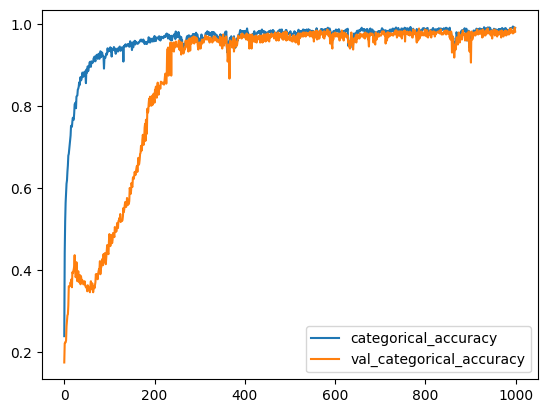

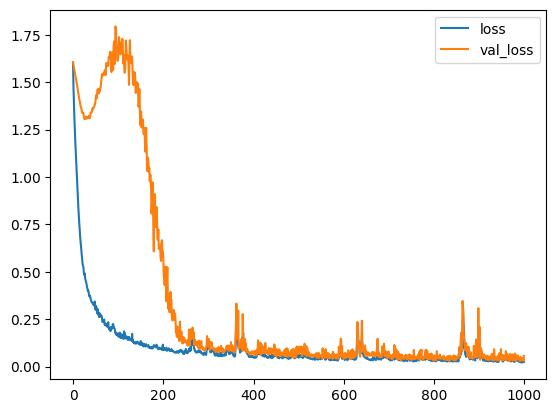

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Max train accuracy: {}".format(history_df['categorical_accuracy'].max()))
print("Max validation accuracy: {}".format(history_df['val_categorical_accuracy'].max()))

In [ ]:
y_pred = Class_model.predict(x_val)
for i in range(y_pred.shape[0]):
    a = y_pred[i, :]
    val = np.max(a)
    a[a != val] = 0
    a[a == val] = 1
    y_pred[i, :] = a

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


In [ ]:
correct = 0
for i in range(y_pred.shape[0]):
    if np.sum(y_val.iloc[i,:]==y_pred[i,:]) == 5:
        correct = correct + 1
accuracy = correct / y_val.shape[0]
print(f"Validation Accuracy = {accuracy*100}%")

Validation Accuracy = 98.2843137254902%


In [ ]:

truelabel = []
predlabel = []

for i in range(y_val.shape[0]):
    if y_val.iloc[i, 0] == 1:
        truelabel.append("LG")
    if y_val.iloc[i, 1] == 1:
        truelabel.append("LL")
    if y_val.iloc[i, 2] == 1:
        truelabel.append("LLG")
    if y_val.iloc[i, 3] == 1:
        truelabel.append("LLL")
    if y_val.iloc[i, 4] == 1:
        truelabel.append("None")
truelabel = np.array(truelabel)

for i in range(y_pred.shape[0]):
    if y_pred[i, 0] == 1:
        predlabel.append("LG")
    if y_pred[i, 1] == 1:
        predlabel.append("LL")
    if y_pred[i, 2] == 1:
        predlabel.append("LLG")
    if y_pred[i, 3] == 1:
        predlabel.append("LLL")
    if y_pred[i, 4] == 1:
        predlabel.append("None")

truelabel = np.array(truelabel)
predlabel = np.array(predlabel)

#Generate the confusion matrix
cf_matrix = confusion_matrix(truelabel, predlabel)

print(f"Confusion Matrix on Validation Data:\n{cf_matrix}")

Confusion Matrix on Validation Data:
[[93  0  0  0  0]
 [ 0 83  6  0  0]
 [ 0  1 85  0  0]
 [ 0  0  0 70  0]
 [ 0  0  0  0 70]]


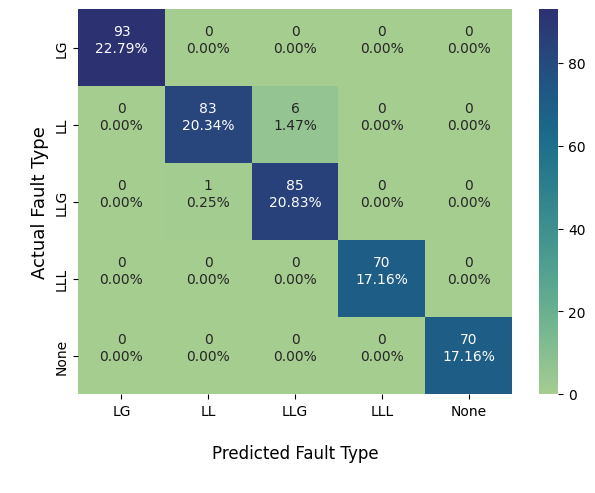

In [ ]:
with plt.style.context('default'):

    figure(figsize=(7, 5), dpi=100)
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n" for v1, v2 in
            zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(5,5)

    ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='crest')

    ax.set_xlabel('\nPredicted Fault Type\n', fontsize = 12)
    ax.set_ylabel('\nActual Fault Type', fontsize = 13);

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(["LG", "LL", "LLG", "LLL", "None"])
    ax.yaxis.set_ticklabels(["LG", "LL", "LLG", "LLL", "None"])

    plt.show()